# Exercise 6: Deconvultion of a spectrum: Determining the position and strength of multiple contributions

There are many experiments that rely on some kind of spectroscopy. The general goal of these experiments  is to accurately determine the spectral position of a level, perhaps the width of the feature and the amplitude. For instance this could be the transition frequency of a hydrogen atom or the resonance frequency in an NMR experiment. The amplitude (or perhaps better the integral) under the curve contains useful information about the strength of the transition and/or the number of atoms/molecules involved.

In an ideal world these resonances occurs as a peak or a dip on an otherwise constant background. Many interesting experiments are a little harder and are not ideal. This has consequences for how we analyze the data.

We consider the following dataset https://itl.nist.gov/div898/strd/nls/data/LINKS/DATA/Gauss3.dat The data are two strongly-blended Gaussians on a decaying exponential baseline plus normally distributed zero-mean noise with variance = 6.25. In the example below we use a local copy of the datafile. 

The goal of this exercise is to find these to lines by separating the spectrum into components, a process known as deconvolution. It is given her that the spectrum consists of a background plus two peaks. 

**Warning: it is possible to fit a Gaussian to a sum of Gaussian, i.e. it is not possible to define a proper inner product in a fucntion space with Gaussians (they are an overcomplete set)**

In [1]:
# Plot settings
import matplotlib.pyplot as plt
# Enable inline plotting
%matplotlib inline

# Some default styling for the figures; best solution is once at the beginning of the code
# See https://matplotlib.org/3.1.3/tutorials/introductory/customizing.html
# These settings assume that you have used import matplotlib.pyplot as plt 

# Smallest font size is a 10 point font for a 4 inch wide figure. 
# font sizes and figure size are scaled by a factor 2 to have a large figure on the screen

SMALL_SIZE = 10*2                                        
MEDIUM_SIZE = 12*2
BIGGER_SIZE = 14*2

plt.rc('font', size=SMALL_SIZE, family='serif')          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)                     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)                    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE, direction='in')    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE, direction='in')    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)                    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)                  # fontsize of the figure title
plt.rc('figure', figsize='8, 6')                         # size of the figure, used to be '4, 3' in inches

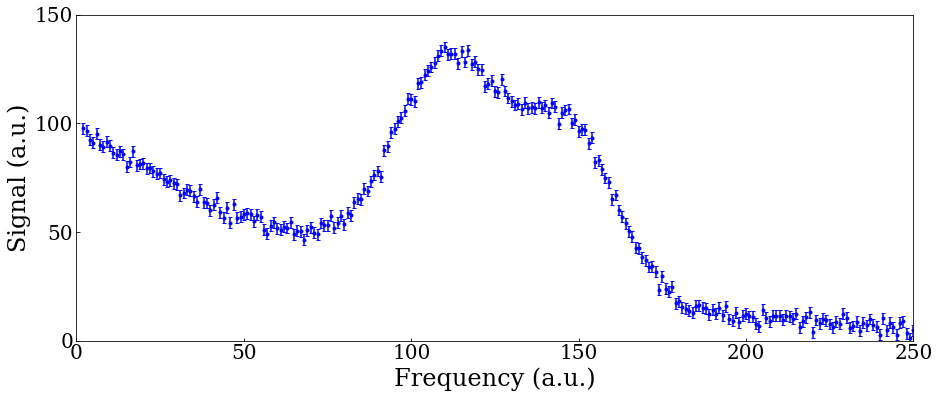

In [2]:
import numpy as np

y, x = np.loadtxt('Gauss3.dat', skiprows=61, unpack=True, )

plt.figure(figsize=(15,6))
plt.errorbar(x, y, yerr=np.sqrt(6.25), color='blue', ls='none', marker='.', capsize=2)
plt.ylabel('Signal (a.u.)')
plt.xlabel('Frequency (a.u.)')
plt.xlim(0,250)
plt.ylim(0,150)
plt.yticks((0,50,100,150))
plt.show()

### a) The spectrum contains two peaks. Use the vertical lines to determine the center position of these lines by pointing to the maximum. 

You can modify the code below to determine the position of the two peaks in the spectrum to the best of your ability, i.e. change the values of x1 and x2.

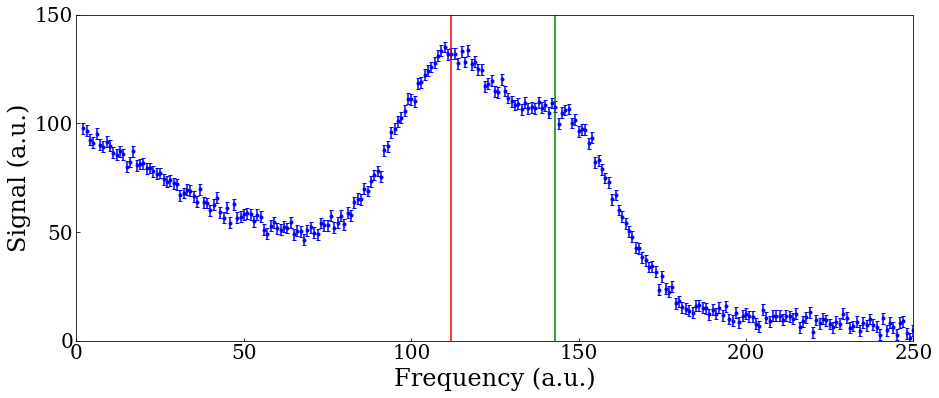

In [3]:
plt.figure(figsize=(15,6))
plt.errorbar(x, y, yerr=np.sqrt(6.25), color='blue', ls='none', marker='.', capsize=2)
plt.ylabel('Signal (a.u.)')
plt.xlabel('Frequency (a.u.)')
plt.xlim(0,250)
plt.ylim(0,150)
plt.yticks((0,50,100,150))

x1,x2 = 112,143
plt.axvline(x=x1, color='red')    # Find approximate position of the first peak
plt.axvline(x=x2, color='green')  # FInd approximate position of the second peak

plt.show()

### b) Create a fit function that include the background and the two Gaussians. Fit this function to the data to determine the spectral position, amplitude and width of two the Gaussians. 

*Hint: You could use the following definition of the Gaussian distribution and start with plotting this together with the data to find reasonable initial parameters. The background could be exponential; this might be a good guess with not too many extra fit parameters. This function was defined in exercise 5.*

To solve the problem one needs to define the fit function as a sum of an exponential and two gaussians. This function has a total of 8 (!) fit parameters and you need to find good initial values. Not giving initial parameters resulted in an error. I had to tweak the parameters a little bit: I reduced the amplitude of the Gaussian function by a factor two to get a good fit. 

Exponential background: 

amplitude     = 98.96 +/-0.55
decay length  = 91.34 +/-1.06

 Gauss 1:
amplitude     = 4158.67 +/-85.89
center freq.  = 111.64 +/-0.35
sigma         = 16.48 +/-0.26

 Gauss 1:
amplitude     = 2569.79 +/-81.42
center freq.  = 147.76 +/-0.41
sigma         = 13.91 +/-0.27

The degrees of freedom for this test is 241
Expectation value of chi-squared is 241.00 with sigma 15.52
The chi squared value is:  199.10


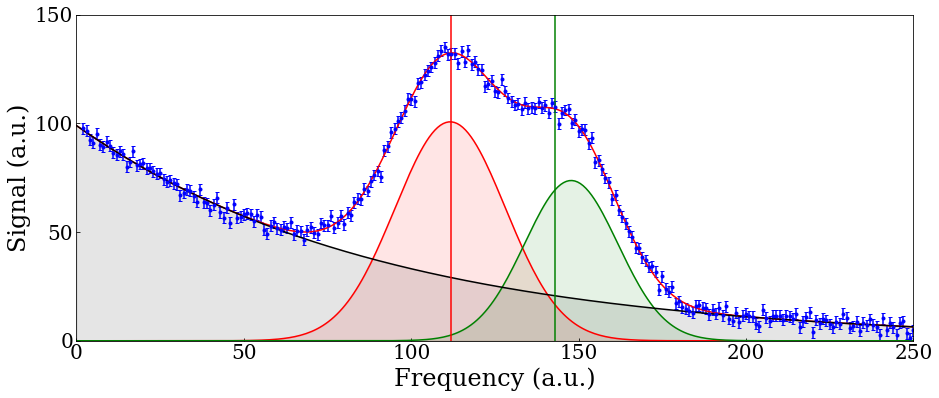

In [4]:
from numpy import sqrt, pi, exp
from scipy.optimize import curve_fit

def exponential(x, amplitude, length):
    "Exponential decay function"
    return (amplitude*np.exp(-x/length))

def gaussian(x, amplitude, center, width):
    "1-d gaussian: gaussian(x, amplitude, center, width)"
    return (amplitude/(sqrt(2*pi)*width)) * exp(-(x-center)**2 /(2*width**2))

def fit(x, ampbg, lengthbg, amp1, cen1, w1, amp2, cen2, w2):
    "Fit function that is a sum of two Gaussians on exponential background"
    return (exponential(x, ampbg, lengthbg)+gaussian(x, amp1, cen1, w1)+gaussian(x, amp2, cen2, w2))

popt, pcov = curve_fit(fit,x,y, p0=(50,200,4000,100,25,3000,180,25)) 

print("Exponential background: \n")
print("amplitude     = %.2f +/-%.2f" %(popt[0],pcov[0,0]**0.5))
print("decay length  = %.2f +/-%.2f" %(popt[1],pcov[1,1]**0.5))

print("\n Gauss 1:")
print("amplitude     = %.2f +/-%.2f" %(popt[2],pcov[2,2]**0.5))
print("center freq.  = %.2f +/-%.2f" %(popt[3],pcov[3,3]**0.5))
print("sigma         = %.2f +/-%.2f" %(popt[4],pcov[4,4]**0.5))

print("\n Gauss 1:")
print("amplitude     = %.2f +/-%.2f" %(popt[5],pcov[5,5]**0.5))
print("center freq.  = %.2f +/-%.2f" %(popt[6],pcov[6,6]**0.5))
print("sigma         = %.2f +/-%.2f" %(popt[7],pcov[7,7]**0.5))

#Derived Chi Squared Value For This Model
chi_squared = np.sum(((fit(x, *popt)-y))**2)/6.25
reduced_chi_squared = (chi_squared)/(len(x)-len(popt))
print('\nThe degrees of freedom for this test is %d'% (len(x)-len(popt)))
print('Expectation value of chi-squared is %.2f with sigma %.2f' % (len(x)-len(popt), np.sqrt(len(x)-len(popt))))
print('The chi squared value is: ',("%.2f" %chi_squared))

plt.figure(figsize=(15,6))
plt.errorbar(x, y, yerr=np.sqrt(6.25), color='blue', ls='none', marker='.', capsize=2)
plt.ylabel('Signal (a.u.)')
plt.xlabel('Frequency (a.u.)')
plt.xlim(0,250)
plt.ylim(0,150)
plt.yticks((0,50,100,150))

xfine=np.linspace(0.,250.,300) #Fine grid of x-points to plot the fit function
xaxis=np.zeros(len(xfine))     #Define array of zeros for the x-axis

plt.plot(xfine, fit(xfine,*popt), ls='solid', color='red')

plt.plot(xfine, gaussian(xfine, popt[2], popt[3], popt[4]), ls='solid', color='red')
plt.fill_between(xfine, xaxis, gaussian(xfine, popt[2], popt[3], popt[4]), color='red', alpha=0.1)

plt.plot(xfine, gaussian(xfine, popt[5], popt[6],popt[7]), ls='solid', color='green')
plt.fill_between(xfine, xaxis, gaussian(xfine, popt[5], popt[6],popt[7]), color='green', alpha=0.1)

plt.plot(xfine, exponential(xfine, popt[0], popt[1]), ls='solid', color='black')
plt.fill_between(xfine, xaxis, exponential(xfine, popt[0], popt[1]), color='black', alpha=0.1)

x1,x2 = 112,143
plt.axvline(x=x1, color='red')    # Find approximate position of the first peak
plt.axvline(x=x2, color='green')  # FInd approximate position of the second peak

plt.show()

### c) Compare your answers from a) and b). Do they agree? If not, how large is the difference? What causes the difference?

The estimate of the peak position for the first peak is reasonably accurate; I would not dare to say that I can determine the position to much better than +/- 1 and I pointed to a position that is almost identical to the result of the fit 112 vs. 111.6. For the second peak I estimated 143 becuase the curve looked kind of flat there and I thought this was the peak maximum. The fit gives 147.7 and you can see that the postion is significantly off. This is becuase the second peak is on a background that is very much not flat, it is on a steep slope provided by the first curve. This shifts the maximum. 

### d) Inspect the covariance matrix for the final fit using the code below. Interpret the values.

In [5]:
for i in range(len(popt)):
    for j in range(len(pcov[i])):
        print("%7.2f \t" %pcov[i][j], end='')
    print(' ')

   0.30 	  -0.41 	   0.98 	  -0.01 	  -0.00 	   6.91 	  -0.00 	   0.02 	 
  -0.41 	   1.13 	 -21.37 	   0.02 	  -0.05 	 -13.14 	  -0.04 	  -0.05 	 
   0.98 	 -21.37 	7377.14 	  26.83 	  20.85 	-6110.02 	  32.22 	 -17.58 	 
  -0.01 	   0.02 	  26.83 	   0.13 	   0.08 	 -27.20 	   0.13 	  -0.08 	 
  -0.00 	  -0.05 	  20.85 	   0.08 	   0.07 	 -17.66 	   0.09 	  -0.05 	 
   6.91 	 -13.14 	-6110.02 	 -27.20 	 -17.66 	6629.17 	 -29.57 	  19.74 	 
  -0.00 	  -0.04 	  32.22 	   0.13 	   0.09 	 -29.57 	   0.16 	  -0.09 	 
   0.02 	  -0.05 	 -17.58 	  -0.08 	  -0.05 	  19.74 	  -0.09 	   0.07 	 


One would expect a nice diagonal matrix if fit parameters are linearly independent. There are several parameters that are correlated. Most notably, the amplitudes of the two gaussians